# Obesity Level Classification Using Physical Condition and Eating Habits

Setup

In [56]:
# Run this before continuing
library(tidyverse)
options(repr.matrix.max.rows = 6)

The Obesity Data Set

In [66]:
obesity <- read_csv("data/ObesityDataSet.csv")
obesity <- obesity %>%
            mutate(NObeyesdad = as_factor(NObeyesdad), CH2O = CH2O - 1)
obesity

Parsed with column specification:
cols(
  Gender = col_character(),
  Age = col_double(),
  Height = col_double(),
  Weight = col_double(),
  family_history_with_overweight = col_character(),
  FAVC = col_character(),
  FCVC = col_double(),
  NCP = col_double(),
  CAEC = col_character(),
  SMOKE = col_character(),
  CH2O = col_double(),
  SCC = col_character(),
  FAF = col_double(),
  TUE = col_double(),
  CALC = col_character(),
  MTRANS = col_character(),
  NObeyesdad = col_character()
)



Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<fct>
Female,21,1.62,64,yes,no,2,3,Sometimes,no,1,no,0,1,no,Public_Transportation,Normal_Weight
Female,21,1.52,56,yes,no,3,3,Sometimes,yes,2,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
Male,23,1.80,77,yes,no,2,3,Sometimes,no,1,no,2,1,Frequently,Public_Transportation,Normal_Weight
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Female,22.52404,1.752206,133.6894,yes,yes,3,3,Sometimes,no,1.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
Female,24.36194,1.739450,133.3466,yes,yes,3,3,Sometimes,no,1.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
Female,23.66471,1.738836,133.4726,yes,yes,3,3,Sometimes,no,1.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


## Data summary

In [67]:
# code here - Philip
# -Height, -Weight, -Physical Activity (FAF), -High calorie meals (FAVC), -Water intake (CH2O), -Smoke (SCC), >Alcohol (CALC)
#Weight, FAF, CH2O, TUE
obesity_num <- obesity %>%
    select(Weight, FAF, CH2O, TUE) %>%
    pivot_longer(cols = Weight:TUE,
                names_to = "Variable",
                values_to = "Stat") %>%
    group_by(Variable) %>%
    summarize(Minimum = min(Stat), Maximum = max(Stat), Mean = mean(Stat), Median = median(Stat), Mode = names(table(Stat))[table(Stat)==max(table(Stat))], Standard_deviation = sd(Stat))

`summarise()` ungrouping output (override with `.groups` argument)



### Summary table for height, weight, physical activity (FAF) and water intake (CH2O)

In [68]:
obesity_num

Variable,Minimum,Maximum,Mean,Median,Mode,Standard_deviation
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
CH2O,0,2,1.0080114,1.00000,1,0.6129535
FAF,0,3,1.0102977,1.00000,0,0.8505924
TUE,0,2,0.6578659,0.62535,0,0.6089273
Weight,39,173,86.5860581,83.00000,80,26.1911717


## Data Visualization

In [59]:
options(repr.plot.width = 12)

### Physical activity frequency

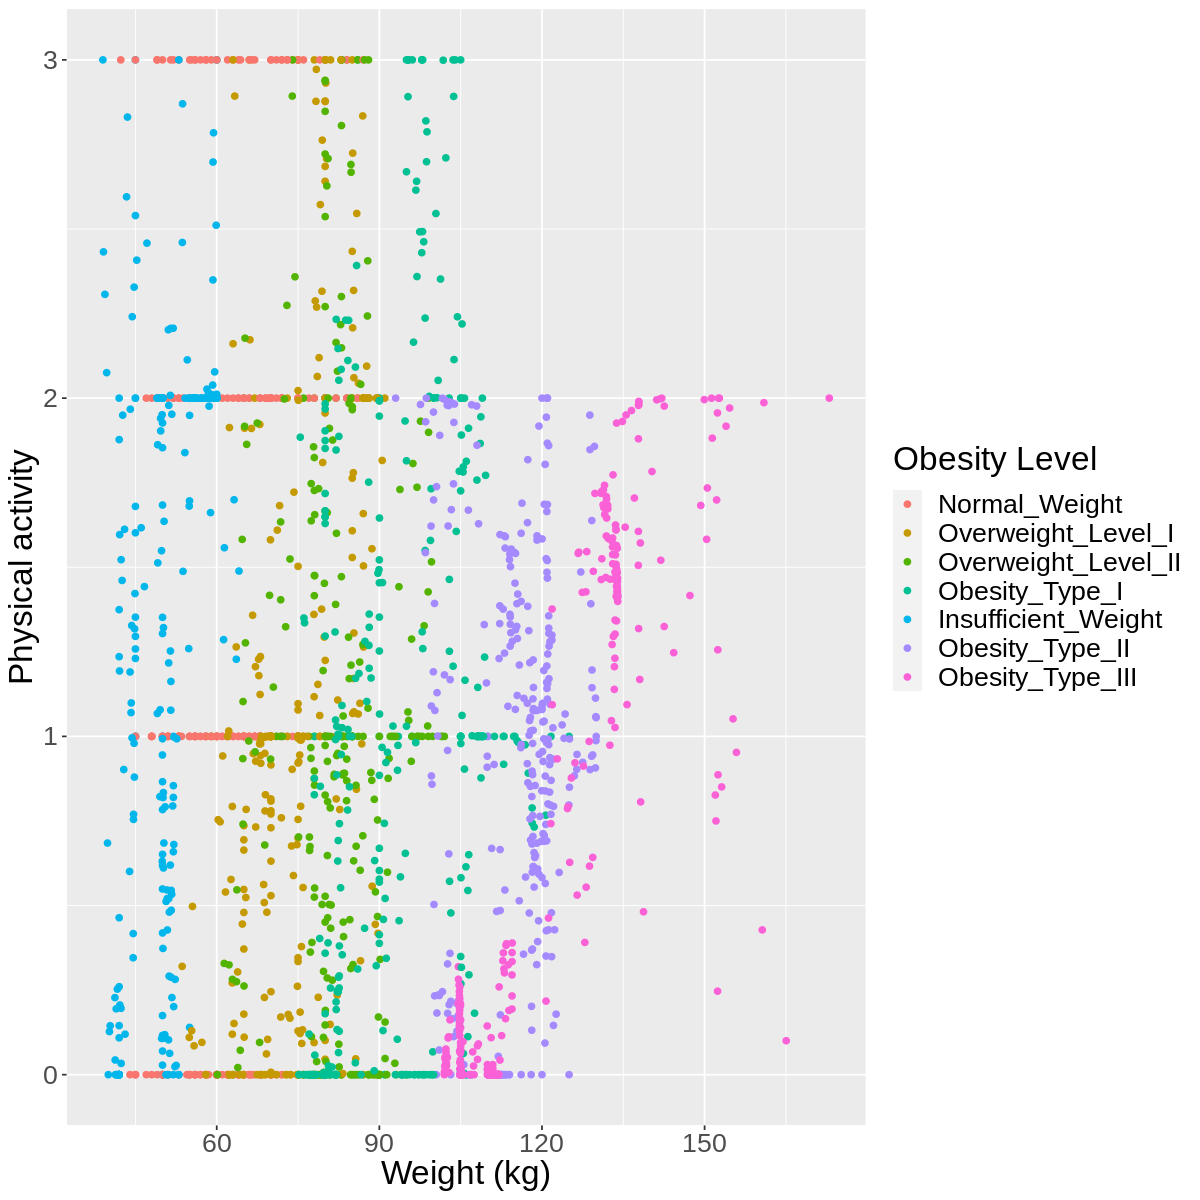

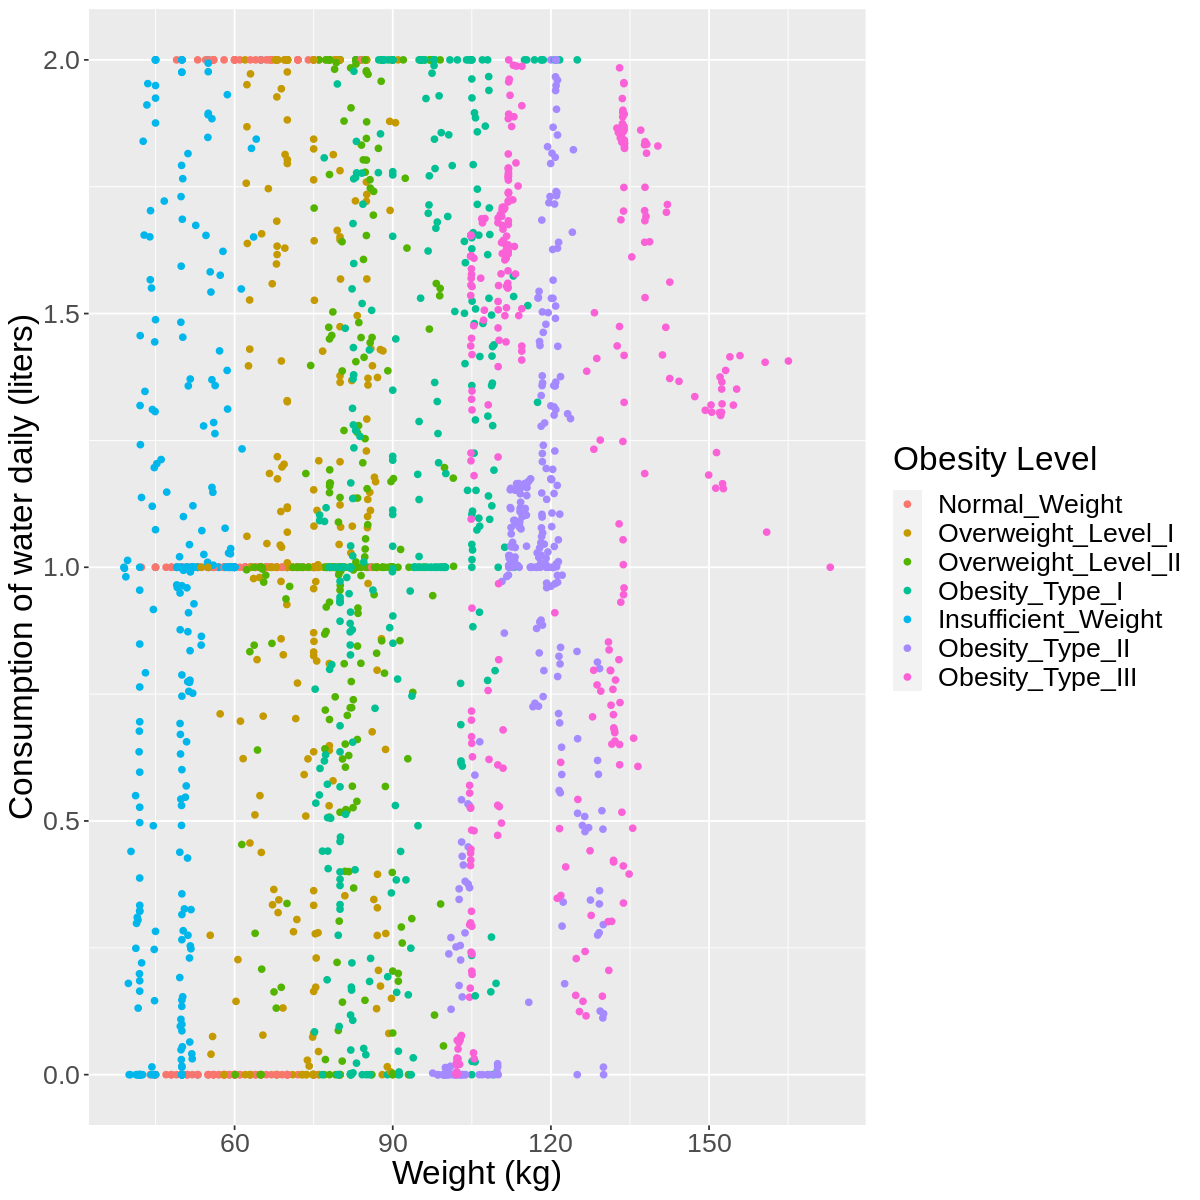

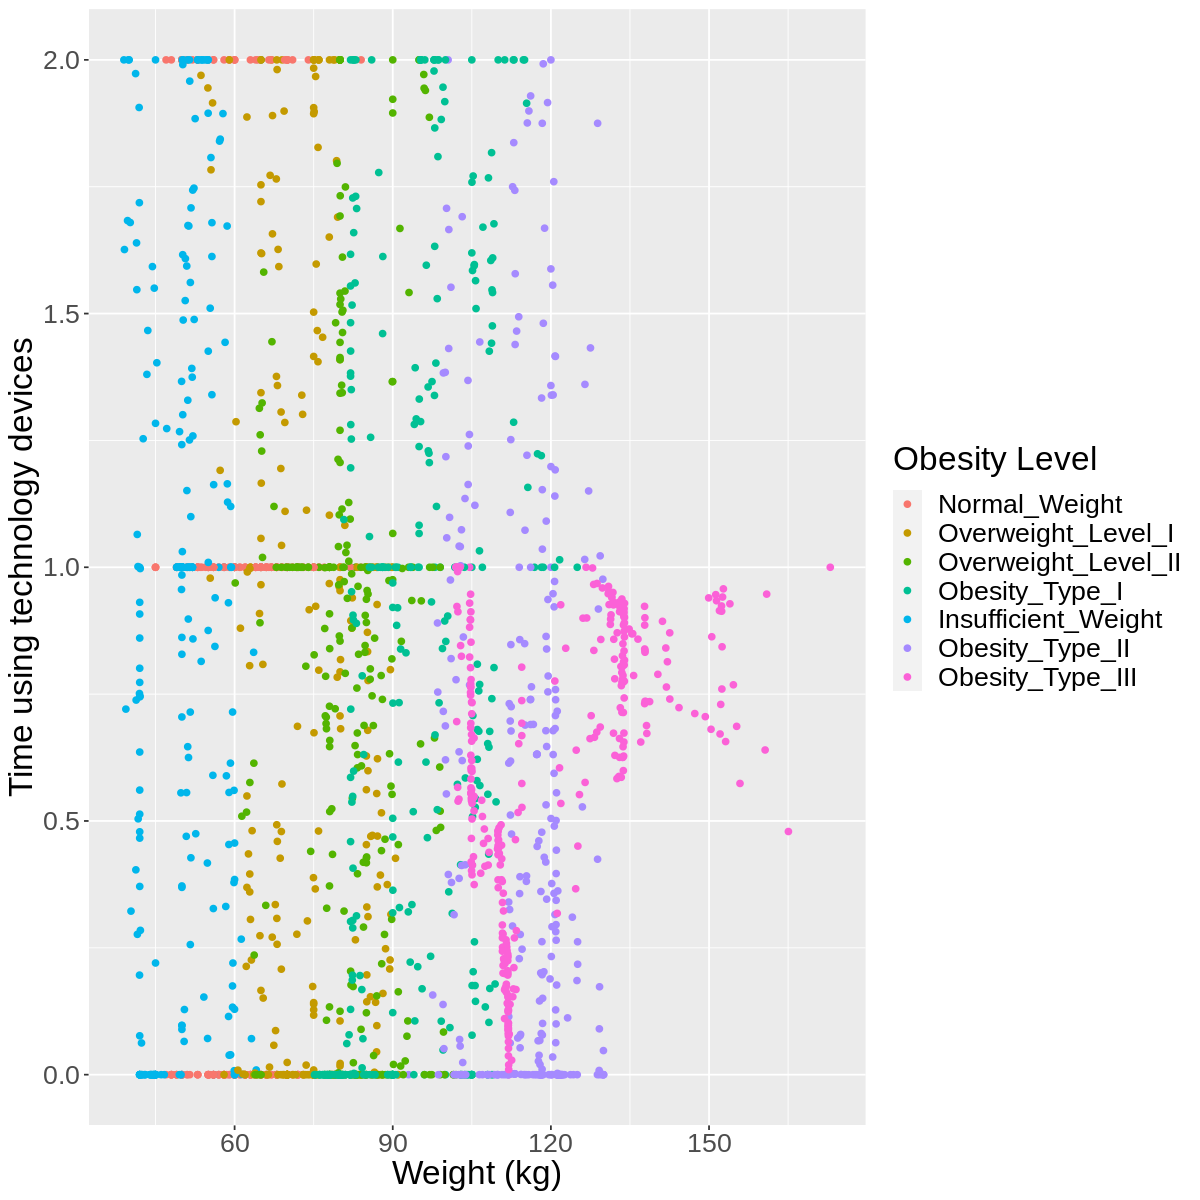

In [75]:
weight_faf_plot <- obesity %>%
                ggplot(aes(x = Weight, y = FAF, color = NObeyesdad)) +
                    geom_point() +
                    labs(x = "Weight (kg)", y = "Physical activity", color = "Obesity Level") +
                    theme(text = element_text(size = 20))

weight_ch2o_plot <- obesity %>%
                ggplot(aes(x = Weight, y = CH2O, color = NObeyesdad)) +
                    geom_point() +
                    labs(x = "Weight (kg)", y = "Consumption of water daily (liters)", color = "Obesity Level") +
                    theme(text = element_text(size = 20))

weight_tue_plot <- obesity %>%
                ggplot(aes(x = Weight, y = TUE, color = NObeyesdad)) +
                    geom_point() +
                    labs(x = "Weight (kg)", y = "Time using technology devices", color = "Obesity Level") +
                    theme(text = element_text(size = 20))

weight_faf_plot
weight_ch2o_plot
weight_tue_plot

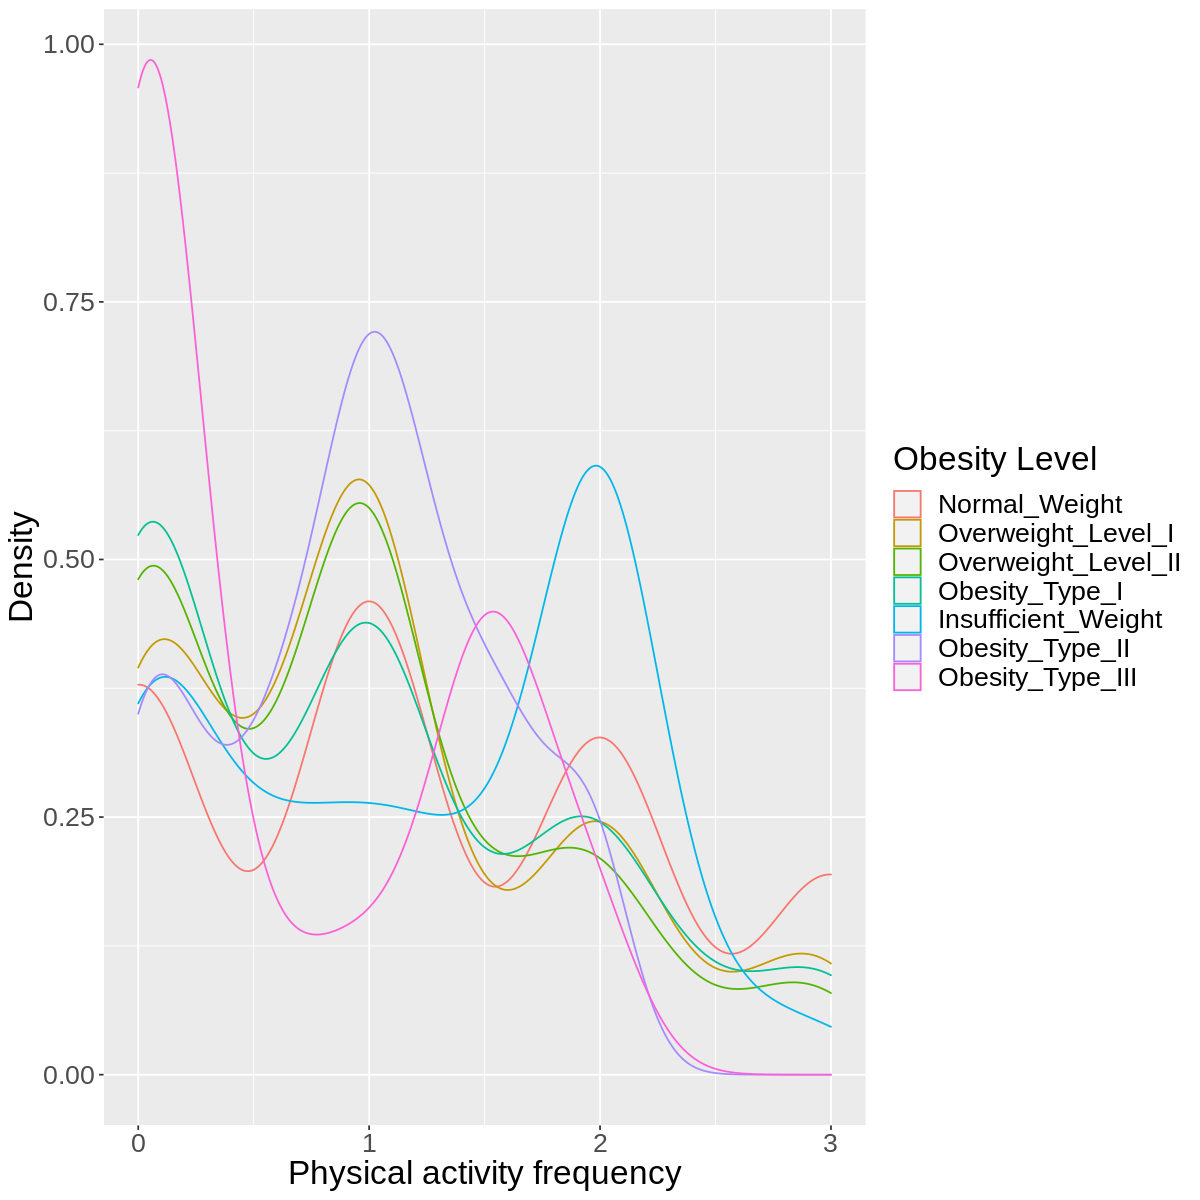

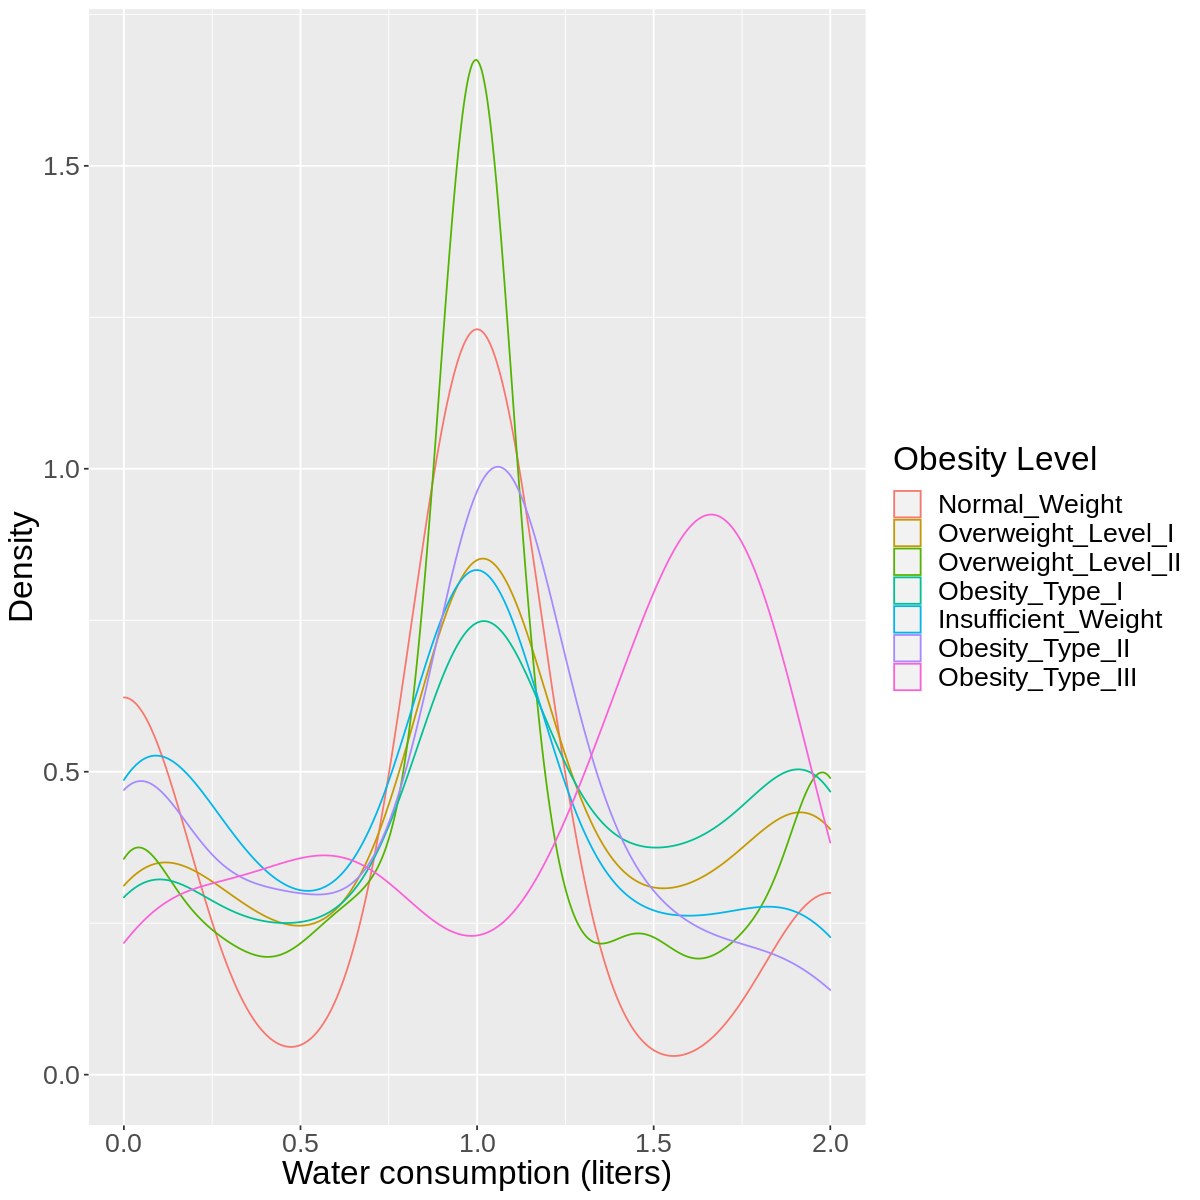

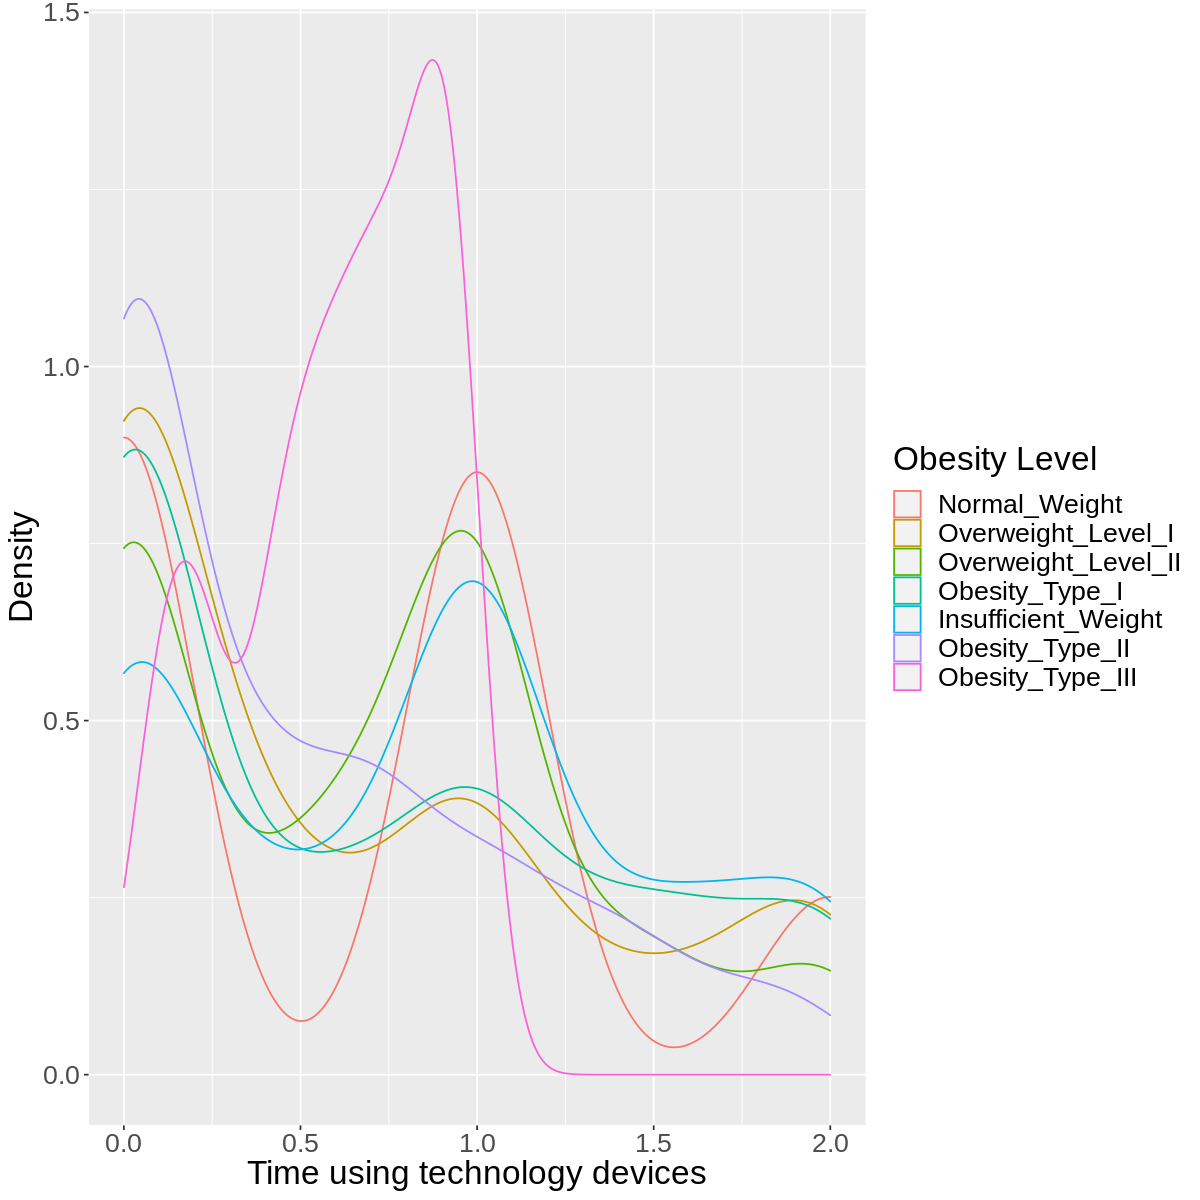

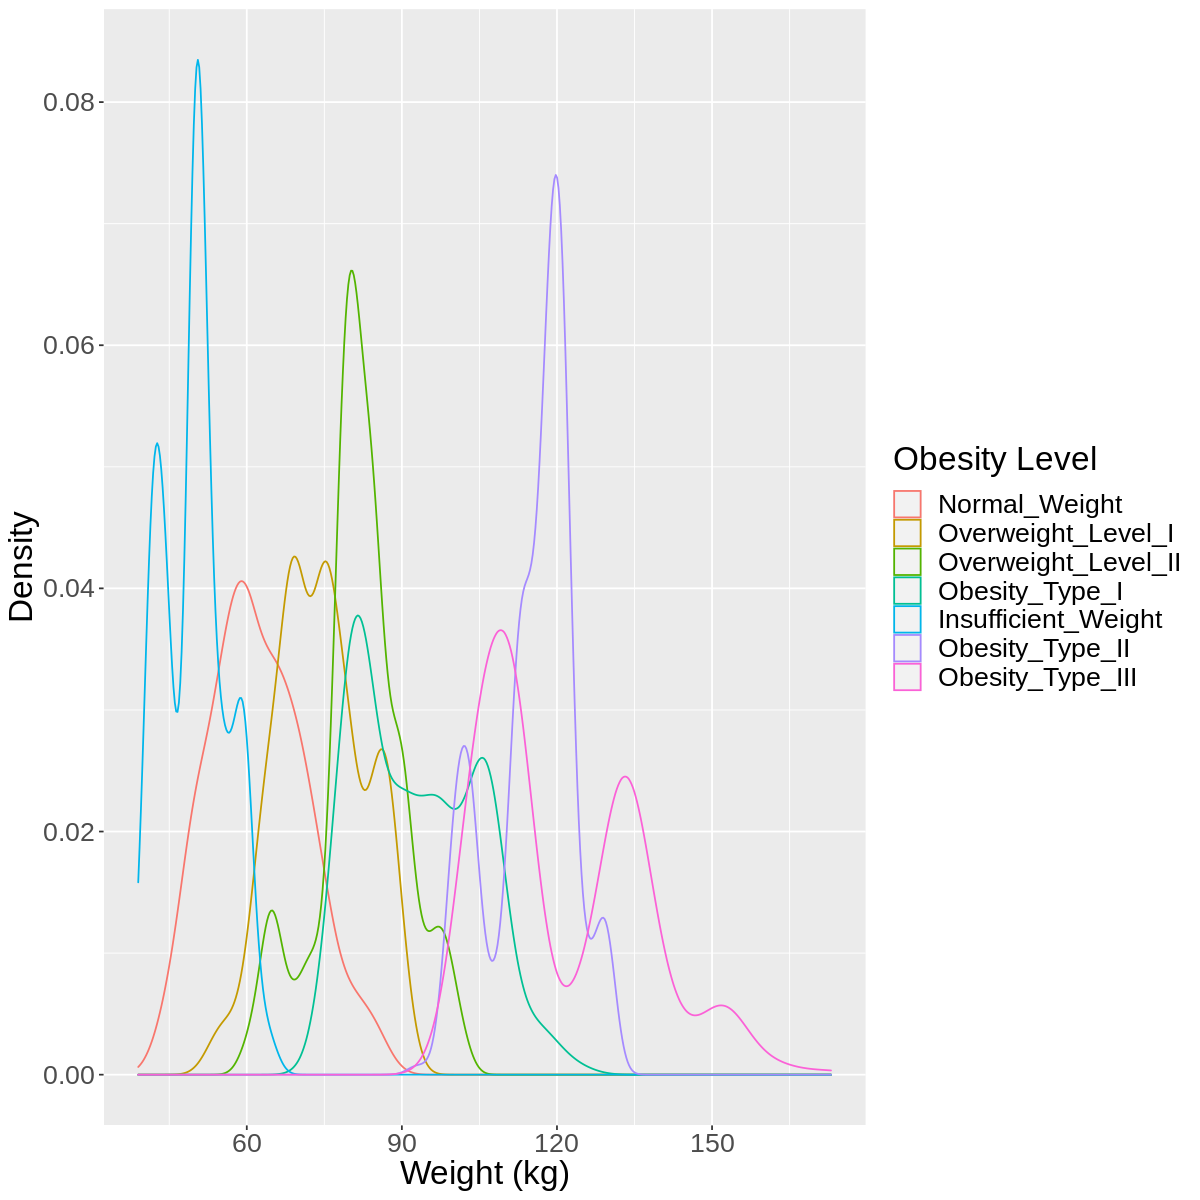

In [74]:
options(repr.plot.width = 10, repr.plot.height = 10)
FAF_plot <- ggplot(obesity, aes(x = FAF, colour = NObeyesdad)) +
    geom_density() +
    labs(x = "Physical activity frequency", y = "Density", colour = "Obesity Level") +
    theme(text = element_text(size = 20))

CH2O_plot <- ggplot(obesity, aes(x = CH2O, colour = NObeyesdad)) +
  geom_density() +
    labs(x = "Water consumption (liters)", y = "Density", colour = "Obesity Level") +
    theme(text = element_text(size = 20))

TUE_plot <- ggplot(obesity, aes(x = TUE, colour = NObeyesdad)) +
  geom_density() +
    labs(x = "Time using technology devices", y = "Density", colour = "Obesity Level") +
    theme(text = element_text(size = 20))

weight_plot <- ggplot(obesity, aes(x = Weight, colour = NObeyesdad))+
  geom_density() +
    labs(x = "Weight (kg)", y = "Density", colour = "Obesity Level") +
    theme(text = element_text(size = 20))



FAF_plot
CH2O_plot
TUE_plot
weight_plot